In [229]:
import numpy as np
import pandas as pd

In [230]:
df = pd.read_csv(r'sms_spam.csv',encoding='latin-1')

In [231]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1117,spam,"449050000301 You have won a å£2,000 price! To ...",NaN,NaN,NaN
1023,ham,May i call You later Pls,NaN,NaN,NaN
1893,ham,Good Morning plz call me sir,NaN,NaN,NaN
4854,ham,Same to u...,NaN,NaN,NaN
682,ham,Is xy going 4 e lunch?,NaN,NaN,NaN


In [232]:
df.shape

(5572, 5)

In [290]:
# 1. Data Cleaning
# 2. EDA
# 3. Data pre-processing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Convert to Website
# 8. Depoly using Heroku

# Data Cleaning

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [235]:
# drop last 3 columns as more then 90% data is missing

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [236]:
# Renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [237]:
from sklearn.preprocessing import LabelEncoder

In [238]:
encoder = LabelEncoder()

In [239]:
df['target'] = encoder.fit_transform(df['target'])

In [240]:
df.sample(5)

,target,text
2381,0,Best line said in Love: . \I will wait till th...
1238,0,"Dear relieved of westonzoyland, all going to p..."
5505,0,What i told before i tell. Stupid hear after i...
4633,0,These won't do. Have to move on to morphine
3313,0,Oh gei. That happend to me in tron. Maybe ill ...


In [241]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [242]:
#Check for duplicate values

df.duplicated().sum()

403

In [243]:
df = df.drop_duplicates(keep='first')

In [244]:
df.shape

(5169, 2)

# 2. EDA

In [245]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [246]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [247]:
import matplotlib.pyplot as plt

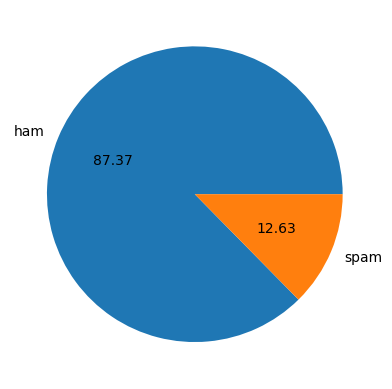

In [248]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [249]:
# Data is imbalanced

In [250]:
import nltk

In [251]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iaman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [252]:
# number of characters
df['num_characters']= df['text'].apply(len)

In [253]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [254]:
# number of words
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [255]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [256]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [257]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [258]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [259]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [260]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [261]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

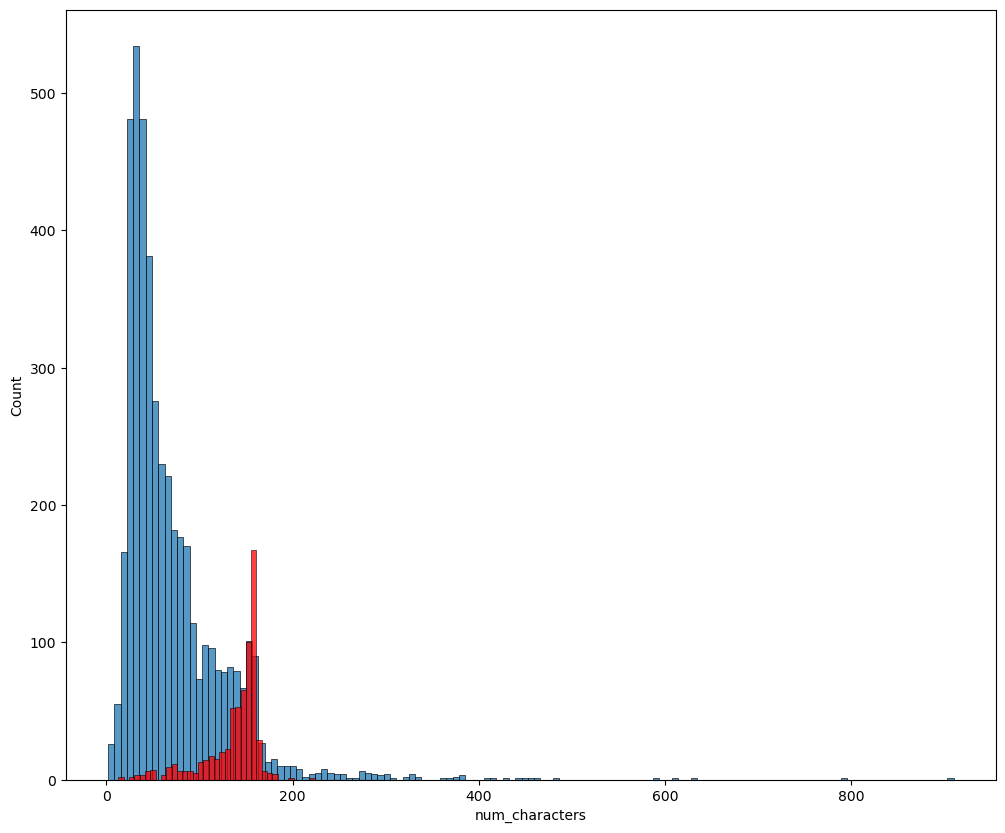

In [262]:
plt.figure(figsize=(12,10))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

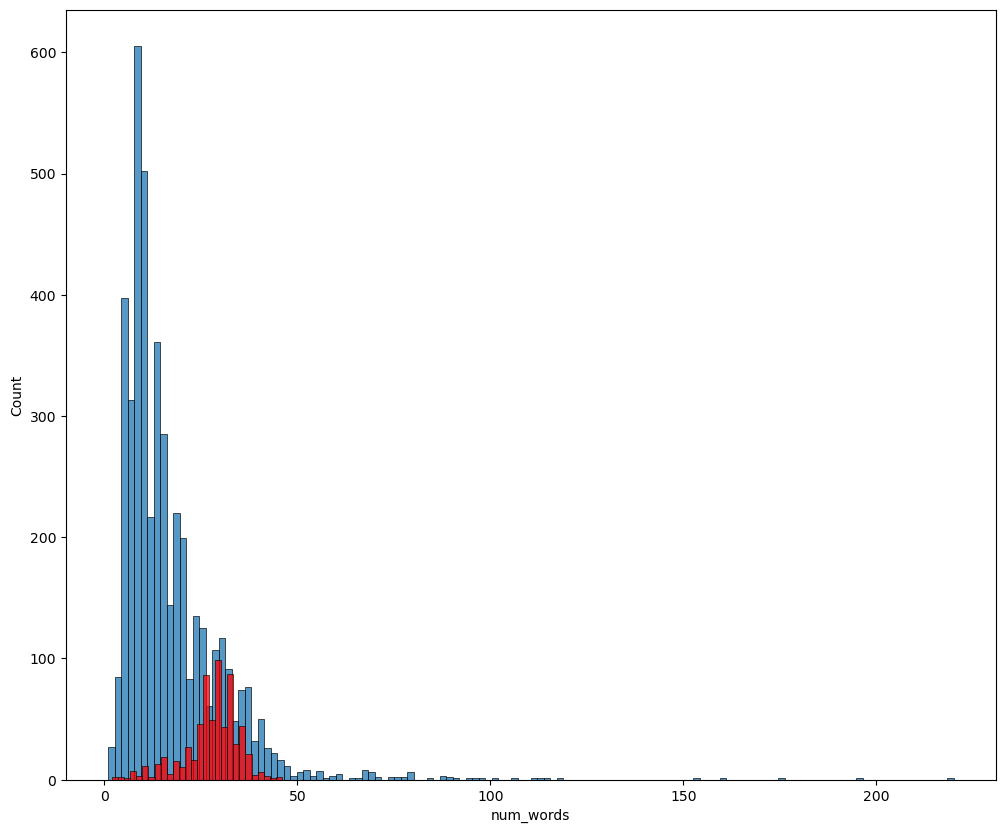

In [263]:
plt.figure(figsize=(12,10))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


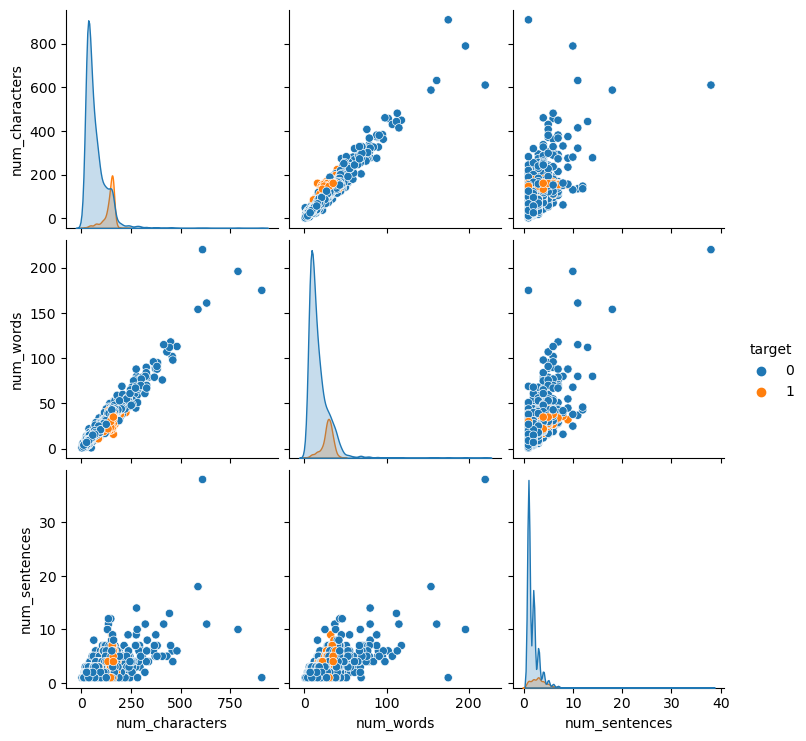

In [264]:
sns.pairplot(df,hue='target')

In [265]:
df1 = df.drop(columns=['text'])

<Axes: >

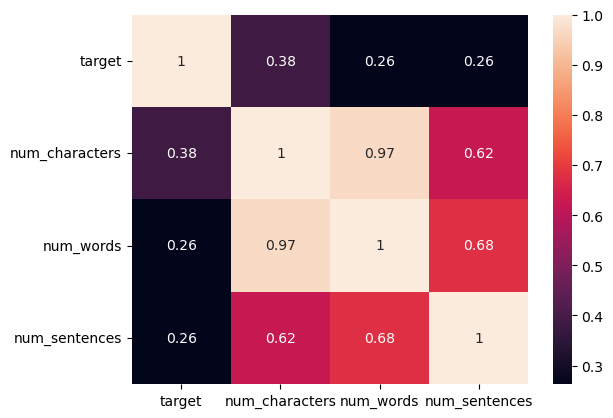

In [266]:
#Correlations

sns.heatmap(df1.corr(),annot=True)

# 3. Data Preprocessing
Lower Case

Tokenization

Remove Special characters

Remove Stop words and Punctuations

Stemming

In [267]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
ps = PorterStemmer()

In [268]:
def transform_text(text):
    
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [269]:
df['transformed_text'] = df['text'].apply(transform_text)

In [270]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [271]:
# Word Cloud of Spam Messages

from wordcloud import WordCloud

In [272]:
wc = WordCloud(width=50, height=50, min_font_size=10, background_color='white')

In [273]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep =" "))

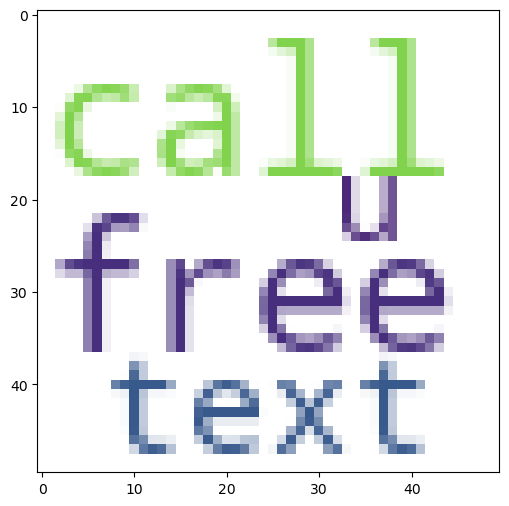

In [274]:
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

In [275]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep =" "))

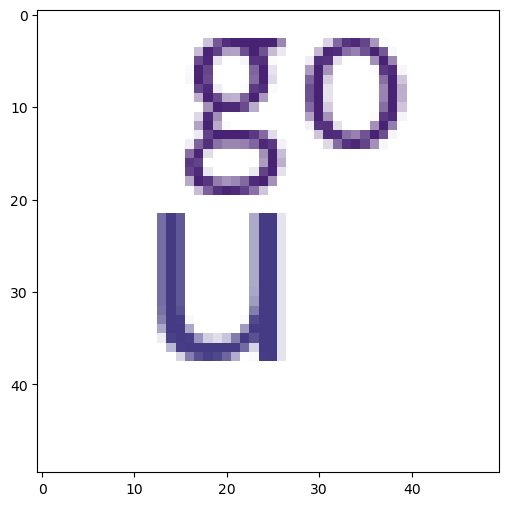

In [276]:
plt.figure(figsize=(10,6))
plt.imshow(ham_wc)

In [277]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [278]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [279]:
len(spam_corpus)

9939

In [280]:
from collections import Counter

In [281]:
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['Word','Frequency'])

In [282]:
spam_corpus_df

,Word,Frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


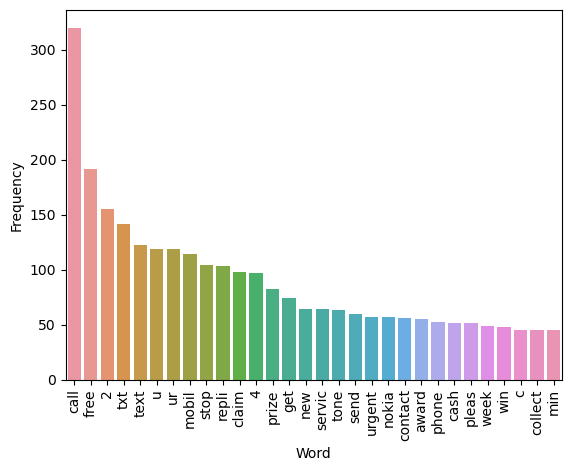

In [283]:
sns.barplot(x='Word',y = 'Frequency',data=spam_corpus_df)
plt.xticks(rotation = 'vertical')
plt.show()

In [284]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [285]:
len(ham_corpus)

35404

In [286]:
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['Word','Frequency'])

In [287]:
ham_corpus_df

,Word,Frequency
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


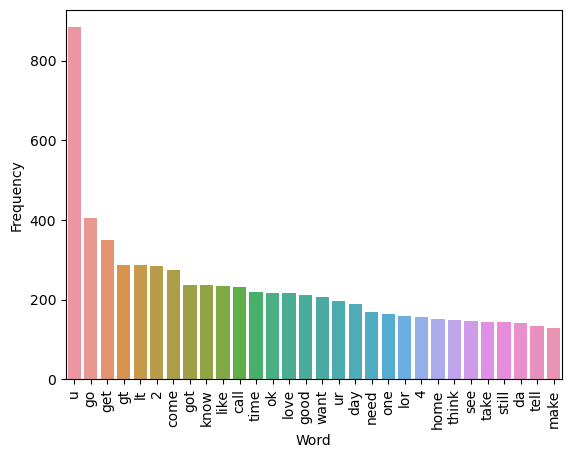

In [288]:
sns.barplot(x='Word',y='Frequency',data=ham_corpus_df)
plt.xticks(rotation = 'vertical')
plt.show()

# 4. Model Building

In [472]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [473]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [474]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [475]:
X.shape

(5169, 3000)

In [476]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [477]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [478]:
# Appending the num_character col to X

#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [479]:
X.shape

(5169, 3000)

In [480]:
y = df['target'].values

In [481]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [482]:
from sklearn.model_selection import train_test_split

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [484]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [433]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [434]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8723404255319149
0.5128205128205128
[[782 114]
 [ 18 120]]


In [485]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [436]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [437]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [438]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

In [439]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XGB' : xgb
}

In [440]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [441]:
train_classifier(lrc,X_train,y_train,X_test,y_test)

(0.9671179883945842, 0.9642857142857143)

In [442]:
accuracy_scale = []
precision_scale = []

for name,clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print('For ',name)
    print('Accuracy_scale - ',current_accuracy)
    print('Precision_scale - ',current_precision)
    print('\n')
    
    accuracy_scale.append(current_accuracy)
    precision_scale.append(current_precision)

For  SVC
Accuracy_scale -  0.9690522243713733
Precision_scale -  0.9274193548387096


For  KN
Accuracy_scale -  0.9052224371373307
Precision_scale -  0.9761904761904762


For  NB
Accuracy_scale -  0.9787234042553191
Precision_scale -  0.9461538461538461


For  DT
Accuracy_scale -  0.9274661508704062
Precision_scale -  0.8118811881188119


For  LR
Accuracy_scale -  0.9671179883945842
Precision_scale -  0.9642857142857143


For  RF
Accuracy_scale -  0.9758220502901354
Precision_scale -  0.9829059829059829


For  AdaBoost
Accuracy_scale -  0.960348162475822
Precision_scale -  0.9292035398230089


For  Bgc
Accuracy_scale -  0.9584139264990329
Precision_scale -  0.8682170542635659


For  ETC
Accuracy_scale -  0.9748549323017408
Precision_scale -  0.9745762711864406


For  GBDT
Accuracy_scale -  0.9468085106382979
Precision_scale -  0.9191919191919192


For  XGB
Accuracy_scale -  0.9671179883945842
Precision_scale -  0.9262295081967213




In [443]:
performance_scale = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scale':accuracy_scale,'Precision_scale':precision_scale}).sort_values(by='Precision_scale',ascending=False)

In [445]:
performance_scale

,Algorithm,Accuracy_scale,Precision_scale
5,RF,0.975822,0.982906
1,KN,0.905222,0.976190
8,ETC,0.974855,0.974576
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
6,AdaBoost,0.960348,0.929204
0,SVC,0.969052,0.927419
10,XGB,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,Bgc,0.958414,0.868217


In [444]:
temp_df = performance_df.merge(performance_df_max_3000,on='Algorithm')

In [446]:
temp_df.merge(performance_scale,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_3000,Precision_max_3000,Accuracy_scale,Precision_scale
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,XGB,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
9,Bgc,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217


In [455]:
# Voting classifier
svc = SVC(kernel='sigmoid',gamma=0.1,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [456]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('etc',etc)],voting='soft')

In [457]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=0.1, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [458]:
y_pred = voting.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9816247582205029
0.968503937007874


In [468]:
# Applying Stacking
estimators = [('svm',svc),('nb',mnb),('etc',etc)]
final_estimator = RandomForestClassifier()

In [469]:
from sklearn.ensemble import StackingClassifier

In [470]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [471]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9816247582205029
0.9541984732824428


In [354]:
# Model Improve
# 1. Change the max_features parameter of tfidf
tfidf = TfidfVectorizer(max_features=3000)

In [487]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))